# 1. Import libraries and most up-to-date project data

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\01-2024 Instacart Basket Analysis'

In [ ]:
# Importing the merged data set

df_all_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged_cleaned.pkl'))

In [ ]:
# Check shape

df_all_merged.shape

In [ ]:
df_all_merged.head()

In [ ]:
# Check info

df_all_merged.info()

In [ ]:
# change data type 'order_id'

df_all_merged['order_id'] = df_all_merged['order_id'].astype(str)

In [ ]:
# not assign any options regarding the maximum number of rows to display

pd.options.display.max_rows = None

In [ ]:
# not assign any options regarding the maximum number of columns to display

pd.options.display.max_columns = None

In [ ]:
# Drop the '_merge' column, since it's not necessary anymore

df_all_merged = df_all_merged.drop(columns=['_merge'])

In [ ]:
# Check the head

df_all_merged.head()

# 2. Data Visualization

# 2.1 Histogram of the “order_hour_of_day”

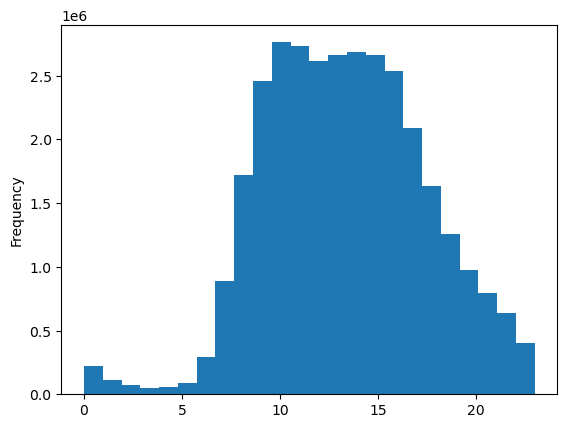

In [65]:
# Create a histogram of the “order_hour_of_day” column

hist_orders_timespann = df_all_merged['order_hour_of_day'].plot.hist(bins = 24)

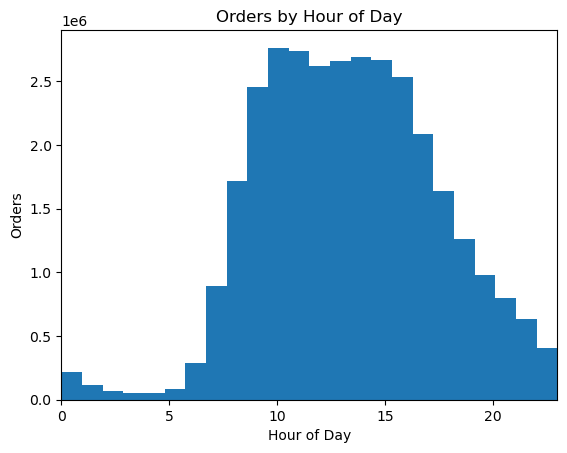

In [66]:
# Setting a better format to display the results


# create histogram for order_hour_of_day

hist_order_hour = df_all_merged['order_hour_of_day'].plot.hist(bins = 24)


# set axis labels

hist_order_hour.set_ylabel('Orders')
hist_order_hour.set_xlabel('Hour of Day')


# set x axis limit

hist_order_hour.set_xlim(0, 23)


# set title

hist_order_hour.set_title('Orders by Hour of Day')


# show plot

plt.show()

## The histogram displayed above shows a distribution that is almost symmetric, but with a slight skew to the left, however it demonstrates a logical user's behavior.  I chose to divide the results in 24 bins, so each bin display 1 hour.

## Early Morning (Before 8 a.m.): Low order activity, reflecting typical inactivity in early hours.

## Late Morning (8 a.m. to 11 a.m.): A significant increase in orders, peaking in this timeframe, possibly as people start their day.  (between 10 and 11 a.m. with approximately 5.5 million orders)

## Afternoon Rush (Noon to 4 p.m.): The highest concentration of orders, indicating a very busy period.

## Post-Peak (After 4 p.m.): Gradual decline in orders as the day progresses into evening.

##  Night (9 p.m. to 6 a.m.): The quietest period, aligning with typical sleeping hours.

In [67]:
# Exporting the chart outside of Jupyter in the form of an image file using (figure.savefig() function)

hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.9', 'hist_orders_hour_day.png')) 

## 2.2 Bar chart - loyalty flag

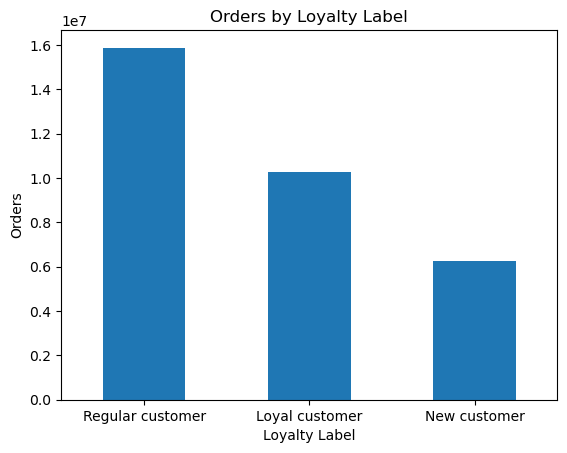

In [75]:
# Setting a better format to display the results

# Creating a Bar Chart

bar_loyalty_flag = df_all_merged['loyalty_flag'].value_counts().plot.bar(title= 'Orders by Loyalty Label')

# set axis labels

bar_loyalty_flag.set_ylabel('Orders')
bar_loyalty_flag.set_xlabel('Loyalty Label')


# rotate x-axis labels

bar_loyalty_flag.set_xticklabels(bar_loyalty_flag.get_xticklabels(), rotation=0)


# show plot

plt.show()

### The bar chart above indicates that the majority of Instacart's consumers are categorized as 'regular customers,' followed by 'loyal customers,' with 'new customers' ranking last.

In [78]:
# Exporting the chart outside of Jupyter in the form of an image file using (figure.savefig() function)

bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.9', 'bar_loyalty_flag.png')) 

# 2.3 Line Chart - Expenditure: prices x hour of the day

# 2.3.1 Sampling the dataframe for the line chart

In [79]:
# Creating a sample,splitting the dataframe into two dataframes at a 70/30 ratio.

# Create a list holding True/False values to test the np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_all_merged)) <= 0.7

In [80]:
# Check the result

dev

array([False,  True, False, ...,  True,  True,  True])

In [81]:
# Store 70% of the sample in the dataframe big

big = df_all_merged[dev]

In [82]:
# Store 30% of the sample in the dataframe small

small = df_all_merged[~dev]

In [83]:
# check the results, len from both subsets together should be equal to the original one

len(df_all_merged)

32404859

In [84]:
len(big) + len(small)

32404859

In [85]:
# reduce the sample to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.” 

df_small_2 = small[['prices','order_hour_of_day']]

In [86]:
# Check the head

df_small_2.head(10)

,prices,order_hour_of_day
0,5.8,11
2,20.0,13
3,20.0,14
6,4.4,13
10,12.8,9
12,11.4,9
13,7.0,13
19,7.0,14
21,7.0,15
22,7.0,11


# 2.3.2 Create a line chart

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


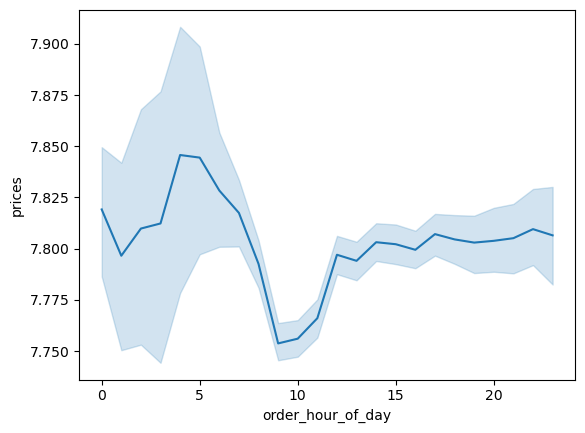

In [87]:
# Creating a line chart of the df_30_sample, the behavior between prices and period of the day 

line = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


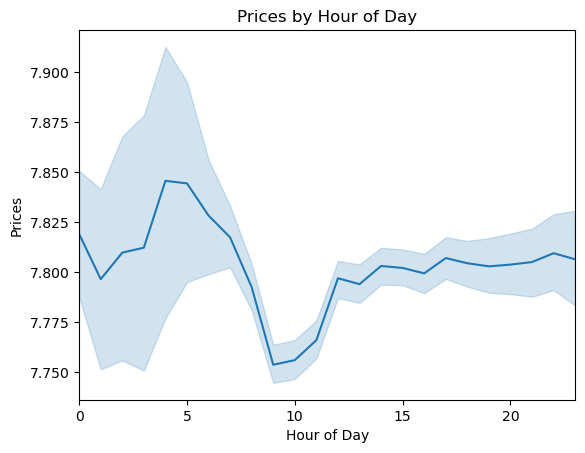

In [89]:
# update chart's format

# create line chart

line = sns.lineplot(data = df_small_2, x = 'order_hour_of_day', y = 'prices')


# set axis labels

line.set_ylabel('Prices')
line.set_xlabel('Hour of Day')


# set x axis limit

line.set_xlim(0, 23)


# set title

line.set_title('Prices by Hour of Day')


# show plot

plt.show()

In [90]:
# Exporting the chart outside of Jupyter in the form of an image file using (figure.savefig() function)

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.9','line_prices_hour_of_day.png')) 

# 2.4 Line chart - customer demographics

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [92]:
# create subset with needed columns only

df_age_dependants = small[['age','n_dependants']]

In [99]:
# Find max and min 'age'

df_age_dependants['age'].min()

18

In [100]:
# Find max and min 'age'

df_age_dependants['age'].max() 

81

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


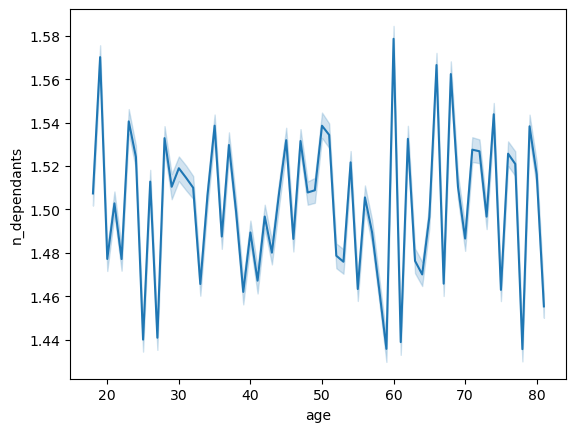

In [93]:
# create line chart

line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'n_dependants')

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


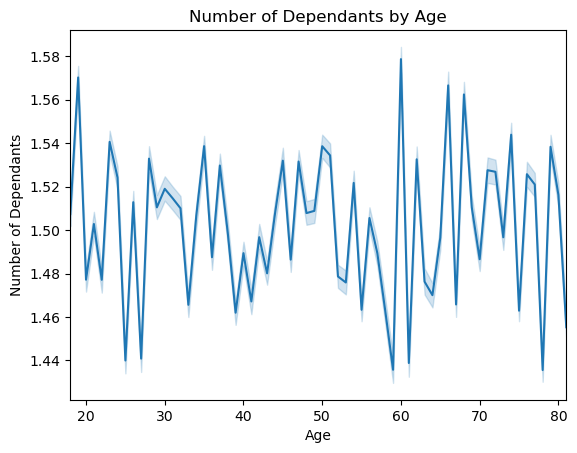

In [101]:
# update chart's format for better visualization

# create line chart

line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'n_dependants')


# set axis labels

line_age_dependants.set_ylabel('Number of Dependants')
line_age_dependants.set_xlabel('Age')


# set x axis limit

line_age_dependants.set_xlim(18, 81)


# set title

line_age_dependants.set_title('Number of Dependants by Age')


# show plot

plt.show()

#### The chart line chart above doesn't demonstrate any correlation between the age of consumers and their number of dependants. Althouhg there are some peaks between people aged 60-70, however randomness still prevails in this chart.

In [102]:
# Exporting the chart 

line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.9','line_age_dependants.png')) 

# 2.5 Scatterplot - Age x Spending power

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.


In [103]:
df_age_income = small[['age', 'income']]

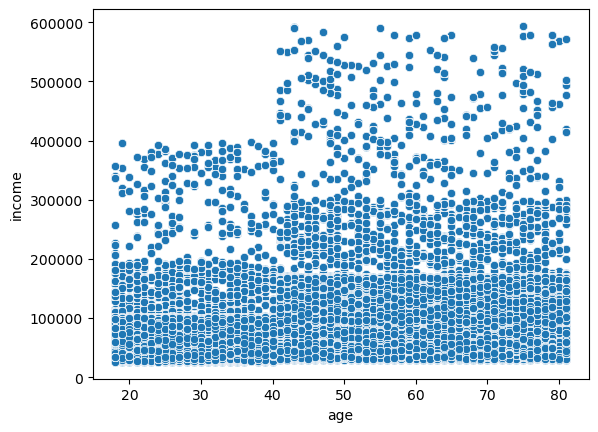

In [104]:
# create scatterplot for age & income

plot_age_income = sns.scatterplot(data = df_age_income, x = 'age', y = 'income')

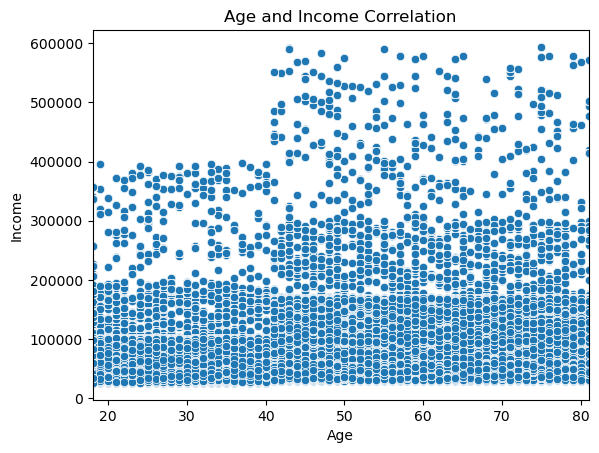

In [109]:
# Update the chart for a better format

# create scatterplot for age & income

plot_age_income = sns.scatterplot(data = df_age_income, x = 'age', y = 'income')


# set axis labels

plot_age_income.set_ylabel('Income')
plot_age_income.set_xlabel('Age')


# set x axis limit

plot_age_income.set_xlim(18, 81)


# set title

plot_age_income.set_title('Age and Income Correlation')


# show plot

plt.show()

#### The chart above illustrates three key points:

#### The majority of people have a relatively low income (< 200,000.00). 

#### Younger consumers (up to 40 years old) experience a peak income, typically below 400,000.00.

#### Individuals aged 40 and above exhibit the highest incomes. 
#### A significant portion falls within the 200,000 - 400,000 range, while a smaller portion falls between 400,00 and 600,000.

In [110]:
# Exporting the chart

plot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.9','plot_age_income.png'))

# 3. Export visualizations

#### The visualizations have already been exported directly beneath their respective charts.